ตัดสินใจว่าจะเล่น tenis หรือไม่

จากที่ผ่านมาเป็นตัวอย่าง Decision Trees อย่างง่าย ซึ่งข้อมูลคุณลักษณะเด่นหรือ Feature
เพียงตัวเดียว คือ size (Foitures มีตัวแปรเดียว) ส่วน Workshop นี้เป็นตัวอย่างที่แสดงให้เห็นถึง (KSA) These ที่ซับซ้อนขึ้น เป็นระบบทำหน้าที่ตัดสินใจว่าจะเล่นเทนนิส (สนามในร่ม) หรือไม่ องค์ประกอบที่ใช้ในการตัดสินใจว่าจะเล่นหรือไม่เล่นเทนนิส มีปัจจัยขึ้นอยู่กับสภาพอากาศ เก็บข้อมูลสภาพอากาศในแต่ละวันและผลการตัดสินใจว่าจะเล่นหรือไม่เล่นเทนนิส รวม 14 วัน (ข้อมูลนี้ใช้สำหรับศึกษา Decision Tree เท่านั้น ของจริงอาจมีปัจจัยแตกต่างกันออกไป)


ปัจจัยหรือข้อมูล (Features) ที่ประกอบการตัดสินใจ
- outlook: สภาพแดด sunny:แดดจ้า Overcast เมฆมากมืดครึ้ม rainy:มีฝน
- temps สภาพอากาศ hotร้อน cool:เย็น mild:กลาง O
- humidity: ความชื้น high normal
- windy: ลม True ลมโกรก False ลมไม่แรง

In [154]:
import pandas as pd

df = pd.read_csv('../../data/playtennis.csv')
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


ดู type

In [155]:
df.dtypes

outlook     object
temp        object
humidity    object
windy         bool
play        object
dtype: object

ตรวจดูว่ามีกี่ class

In [156]:
df.play.unique()

array(['no', 'yes'], dtype=object)

นับจำนวนว่าแต่ละ class มีกี่ข้อมูล

In [157]:
df.groupby('play').count()

,outlook,temp,humidity,windy
play,,,,
no,9,9,9,9
yes,11,11,11,11


เช็คว่ามี null หรือเปล่า

In [158]:
df.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

เข้ารหัสด้วย Label Encoding

ทําการเข้ารหัส outlook, temp, humidity และ windy แปลง String ข้อความให้เป็น ตัวเลข แล้วเก็บไว้ทีคอลัมน์ outlook_, temp_, humidity_ และ windy (ใส่ underscore เพื่อ ให้ชื่อคอลัมน์แตกต่างกัน ซึ่งจริงๆ จะแทนที่ทับคอลัมน์เดิมไปเลยก็ได้ แต่ตอนนี้ ต้องการให้เปรียบ เทียบข้อมูลก่อนและหลังการเข้ารหัส)

In [159]:
from sklearn.preprocessing import LabelEncoder


def label_encode(data, columns):
    for i in columns:
        #         print(i)
        lb = LabelEncoder().fit_transform(data[i])
        data[i + '_'] = lb


print('=========== before =========== ')
print(df)
print('=========== end before =========== ')

columns = ['outlook', 'temp', 'humidity', 'windy']
label_encode(df, columns)

print('=========== after =========== ')
print(df)
print('=========== end after =========== ')

y_le = LabelEncoder()
y = y_le.fit_transform(df.play)
y

=========== before =========== 
     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no
14  overcast   hot     high  False  yes
15     rainy  mild     high  False  yes
16     sunny  mild     high  False   no
17     rainy  cool   normal   True   no
18     sunny   hot     high  False   no
19     sunny   hot     high   True   no
=========== end before =========== 
=========== after =========== 
     outlook  temp humidity  windy play  outlook_  temp_  hum

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [160]:
df['play_'] = y
df

,outlook,temp,humidity,windy,play,outlook_,temp_,humidity_,windy_,play_
0,sunny,hot,high,False,no,2,1,0,0,0
1,sunny,hot,high,True,no,2,1,0,1,0
2,overcast,hot,high,False,yes,0,1,0,0,1
3,rainy,mild,high,False,yes,1,2,0,0,1
4,rainy,cool,normal,False,yes,1,0,1,0,1
5,rainy,cool,normal,True,no,1,0,1,1,0
6,overcast,cool,normal,True,yes,0,0,1,1,1
7,sunny,mild,high,False,no,2,2,0,0,0
8,sunny,cool,normal,False,yes,2,0,1,0,1
9,rainy,mild,normal,False,yes,1,2,1,0,1


เอาข้อมูลไป train

In [161]:
X = df[['outlook_', 'temp_', 'humidity_', 'windy_']]  # or X = df.iloc[:,5:-1]
X[:5]

,outlook_,temp_,humidity_,windy_
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0


train

In [162]:
print('x >>')
print(X)
print('y >>', y)

x >>
    outlook_  temp_  humidity_  windy_
0          2      1          0       0
1          2      1          0       1
2          0      1          0       0
3          1      2          0       0
4          1      0          1       0
5          1      0          1       1
6          0      0          1       1
7          2      2          0       0
8          2      0          1       0
9          1      2          1       0
10         2      2          1       1
11         0      2          0       1
12         0      1          1       0
13         1      2          0       1
14         0      1          0       0
15         1      2          0       0
16         2      2          0       0
17         1      0          1       1
18         2      1          0       0
19         2      1          0       1
y >> [0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0]


In [163]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

ทำนาย

In [164]:
class_names = list(y_le.classes_)
class_names

['no', 'yes']

In [165]:
data = [[1, 2, 0, 0]] # rainy , mild, high, false
y_predict = model.predict(data)

prd = class_names[y_predict[0]]
print('Result : {}'.format(prd))

Result : yes


E:\work\machine_learing101\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


show diagram

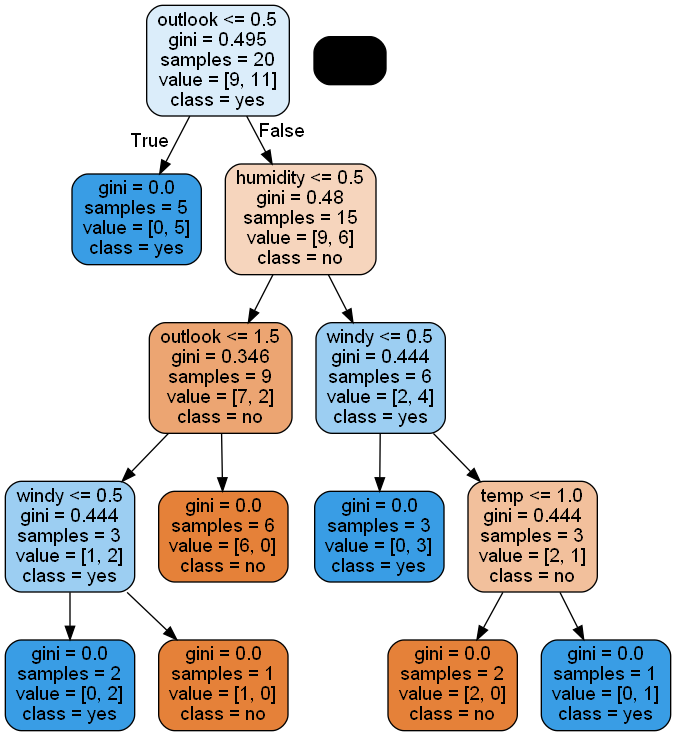

In [166]:
data_feature_names = 'outlook', 'temp', 'humidity', 'windy'

import pydotplus

from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None,
                           feature_names=data_feature_names,
                           class_names=class_names,  #
                           filled=True,
                           rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)  # Draw graph
Image(graph.create_png())  # Show graph